# Using Inbuilt Naive Bayes Classifier - MultinomialNB

In [34]:
#Various models required
import numpy as np
import pandas as pd
import operator
import os,sys
from sklearn import model_selection
import re,string
import matplotlib.pyplot as plt

In [35]:
#Dataset Used can be downloaded from below link
#http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

#X is a list further made in form of tuple , 
# where first element is name of document and second is the text in documents.
#Y is the list of category

#change the path of dataset according to the your respective path
X  =[] 
Y = []
for category in os.listdir("Datasets"):
    for document in os.listdir("Datasets/"+category):
        with open("Datasets/"+category+'/'+document, "r") as f:
            X.append((document,f.read()))
            Y.append(category)

In [36]:
#DataType of X and Y in detail
print(type(X))
print(type(X[0]))
print(type(X[0][0]))
print(type(X[0][1]))
print(type(Y))
#We can notice that it is a tuple
#the tuple has its first element as name of document and second element as text of document.
# Remove comment in the following lines to check output and get more familiar with data

# print(X[0][1])
# print(X[1][1])
# print(X[1])

<class 'list'>
<class 'tuple'>
<class 'str'>
<class 'str'>
<class 'list'>


In [37]:
#splitting the data in training and testing
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y, random_state=0)

In [38]:
#split has done in nearly 3:1 ratio
#you can change the ratio of spliting by passing a argumnent in train_test_split() i.e, test_size
print(len(x_train))
print(len(x_test))

14997
5000


In [39]:
#Using RegEx to split the text into seprate words 
#Example for showing re.split
sample_text="Hey! I am Anshika. I am superb. What are you doing there?"
print(re.split(r'\W+',sample_text))

['Hey', 'I', 'am', 'Anshika', 'I', 'am', 'superb', 'What', 'are', 'you', 'doing', 'there', '']


In [40]:
#Stop Words : words that are common in all type of text documents,
#they don't help us in finding the probability as they are common in every category
#This are stop_words in common taken from intenet.
stop_word=["a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been","before","being","below","between","both","but",
"by","could","did","do","does","doing","down","during","each","few","for","from","further","had","has","have","having","he","he'd","he'll","he's","her",
"here","here's","hers","herself","him","himself","his","how","how's","i","i'd","i'll","i'm","i've","if","in","into","is","it","it's","its","itself","let's","me",
"more","most","my","myself","nor","of","on","once","only","or","other","ought","our","ours","ourselves","out","over","own","same","she",
"she'd","she'll","she's","should","so","some","such","than","that","that's","the","their","theirs","them","themselves","then","there","there's",
"these","they","they'd","they'll","they're","they've","this","those","through","to","too","under","until","up","very","was","we","we'd",
"we'll","we're","we've","were","what","what's","when","when's","where","where's","which","while","who","who's","whom","why","why's","with",
"would","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves"]

In [42]:
#Making Dictionary of words with their corresponding frequency
dicn={}
for i in range(len(x_train)):
    #Took [1] because [0] is name of document and [1] is text in doc
    word=x_train[i][1].lower()
    #splitting the text into seprate words
    stripped=re.split(r'\W+',word)
    #Iterating over each word
    for s in stripped:
        #we will not include stop_words, alpha-numerics, punctuations or irrelevant word of length less than 2 in our dictionary
        if not(s.isalpha()) or s in stop_word or len(s)<=2:
            continue
        if s in dicn:
            dicn[s]+=1
        else:
            dicn[s]=1
            
# Remove comment from below to print the dictionary that we created
# dicn

In [43]:
#Sorting the dictionary on basis of frequency of words in descending order
#you can read more about itemgetter using help(operator.itemgetter)

sorted_dicn = sorted(dicn.items(), key=operator.itemgetter(1),reverse=True)
# sorted_dicn

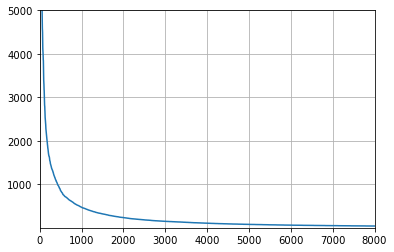

In [44]:
#Plotting graph on no. of words vs corresponding frequency
#On basis of graph we can decide the number of features(words) we want to take
features=sorted_dicn
ft_list=[]
ft_list_freq=[]
for i in range(len(features)):
    ft_list.append(i)
    ft_list_freq.append(features[i][1])
plt.plot(ft_list,ft_list_freq)
plt.axis([0,8000,1,5000])
plt.grid()
plt.show()   


In [45]:
#We decided to take top 2000 words with max freuqency as our feature
#here feature list is ft_list
ft_list=[features[i][0] for i in range(2000)]

# Remove comment to take a look at 2000 words we selected
# ft_list

In [46]:
#Making x_train dataset
#No. of rows is equivalent to rows in x_train, and column is equal to length of ft_list(feature list)
x_train_dataset=np.zeros([len(x_train),len(ft_list)],int)
for i in range(len(x_train)):
    words=x_train[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our ft_list(feature list)
        if j in ft_list:
            x_train_dataset[i][ft_list.index(j)]+=1

In [14]:
#Making x_test dataset
#No. of rows is equivalent to rows in x_test, and column is equal to length of answer1(feature list)
x_test_dataset=np.zeros([len(x_test),len(ft_list)],int)
for i in range(len(x_test)):
    words=x_test[i][1].lower()
    word=re.split(r'\W+',words)
    #Iterating over each word
    for j in word:
        #We will add the frequency corresponding to that word only which is in our answer1(feature list)
        if j in ft_list:
            x_test_dataset[i][ft_list.index(j)]+=1

In [47]:
#printing x_train and x_test dataset 
# print(x_train_dataset)
# print("--------------------------")
# print(x_test_dataset)

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [49]:
#Demonstrating confusion-matrix and classification report
clf=MultinomialNB()
clf.fit(x_train_dataset,y_train)
y_pred=clf.predict(x_test_dataset)
print("Score on training data:",clf.score(x_train_dataset,y_train))
print("Score on testing data:",clf.score(x_test_dataset,y_test))

# Remove comments from below if you want to take a look at confusion Matrix and and classification report

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))


Score on training data: 0.8933786757351471
Score on testing data: 0.8558


# Self Implementation of Naive Baye's

In [50]:
#Making dictionary for implementing Naive Baye's
def fit(x_train_dataset,y_train):
    count={}
    total_word=0
    y_train=np.array(y_train)
    #Total no. of documents is calculated
    count["total_doc"]=len(y_train)
    classes=set(y_train)
    for i in classes:
        temp=0
        #selecting x_train corresponding to class present in y_train
        x_train_with_i=x_train_dataset[y_train==i]
        #finding length of data with category corresponding to i 
        temp2=x_train_with_i.shape[0]
        count[i]={}
        #Iterating over ft_list(actual feature list)
        for feature in ft_list:
            #Calculating total word in feature
            l=(x_train_with_i[:,ft_list.index(feature)]).sum()
            count[i][feature]=l
            temp+=l
        #Total word in that class
        count[i]["word_in_class"]=temp
        #Length of data with y_train belonging to specific class
        count[i]["length"]=temp2
        
    
    return count


In [51]:
def probability(x_test,dic,classes):
    prob=np.log(dic[classes]["length"])-np.log(dic["total_doc"])
    feature=list(dic[classes].keys())
    #-2 is done becuase there will be "length" and "word in class" present in feature. 
    for j in range (len(feature)-2):
        xj=x_test[j]
        #If frequency is 0, we will not consider it
        if xj==0:
            current_prob=0
        else:
            #Extra addition part is Laplace correction
            num=dic[classes][feature[j]]+1
            den=dic[classes]["word_in_class"]+len(dic[classes].keys())-2
            current_prob=np.log(num)-np.log(den)
        prob+=current_prob
    return prob
    

In [52]:
#Best_class or probable answer will be returned from here
def predict_for_single(x_test,dic):
    first_run=True
    classes=dic.keys()
    for i in classes:
        if i=="total_doc":
            continue
        prob=probability(x_test,dic,i)
        if first_run or prob>best_prob:
            best_prob=prob
            first_run=False
            best_class=i
    return best_class

In [53]:
def predict_(x_test,dic):
    y_pred=[]
    for x in x_test:
        y_pred.append(predict_for_single(x,dic))
    return y_pred

In [54]:
def score(y_test,y_pred):
        count = 0
        for i in range(len(y_pred)):
            if y_pred[i] == y_test[i]:
                count+=1
        return count/len(y_pred)

In [55]:
#This cell will take time to execute
dictionary=fit(x_train_dataset,y_train)
y_pred=predict_(x_test_dataset,dictionary)


In [56]:
# dictionary

In [57]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [58]:
print("Score on testing_data:",score(y_test,y_pred))

# Remove comments from below if you want to take a look at confusion Matrix and and classification report
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

Score on testing_data: 0.8722
